In [2]:
import numpy as np

arr = np.random.randint(0, 101, size=200)


filtered = arr[arr > 60]

mean_val = np.mean(filtered)
median_val = np.median(filtered)
std_val = np.std(filtered)

print("Count >", 60, ":", len(filtered))
print("Mean:", mean_val)
print("Median:", median_val)
print("Std:", std_val)


Count > 60 : 84
Mean: 82.08333333333333
Median: 85.0
Std: 10.827883244455286


In [1]:
import pandas as pd
import numpy as np


df = pd.DataFrame({
    "age": [22, 25, 30, 35, 28, 40, 45, 50, 33, 27, 38, 42],
    "income": [40000, 55000, 70000, 90000, 60000, 120000, 80000, 150000, 65000, 50000, 110000, 95000],
    "visits": [2, 3, 4, 5, 2, 6, 4, 8, 3, 2, 7, 5]
})


df.loc[3, "income"] = np.nan


median_income = df["income"].median()
df["income"] = df["income"].fillna(median_income)


df["income_per_visit"] = df["income"] / df["visits"]


filtered_df = df[df["income_per_visit"] > 15000]

print(filtered_df)


    age    income  visits  income_per_visit
0    22   40000.0       2      20000.000000
1    25   55000.0       3      18333.333333
2    30   70000.0       4      17500.000000
4    28   60000.0       2      30000.000000
5    40  120000.0       6      20000.000000
6    45   80000.0       4      20000.000000
7    50  150000.0       8      18750.000000
8    33   65000.0       3      21666.666667
9    27   50000.0       2      25000.000000
10   38  110000.0       7      15714.285714
11   42   95000.0       5      19000.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
income = np.random.randint(30000, 150000, 200)
noise = np.random.normal(0, 0.15, 200)
probability_of_purchase = 0.000005 * income + noise

probability_of_purchase = np.clip(probability_of_purchase, 0, 1)


plt.figure()
plt.scatter(income, probability_of_purchase)


m, b = np.polyfit(income, probability_of_purchase, 1)
plt.plot(income, m * income + b)

plt.text(40000, 0.9, "Patterns can deceive")

plt.xlabel("Income")
plt.ylabel("Probability of Purchase")
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)


n = 2000
df = pd.DataFrame({
    "age": np.random.randint(18, 66, size=n),
    "income": np.random.randint(30000, 150001, size=n),
    "visits": np.random.randint(1, 11, size=n)
})


df["target"] = ((df["income"] > 80000) & (df["visits"] > 5)).astype(int)

X = df[["age", "income", "visits"]]
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)


tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)

print("Logistic Regression accuracy:", acc_lr)
print("Decision Tree accuracy      :", acc_tree)


Logistic Regression accuracy: 0.8966666666666666
Decision Tree accuracy      : 1.0


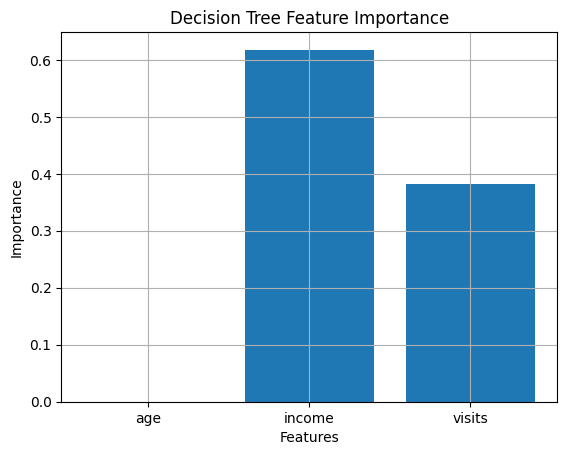

age: 0.000
income: 0.618
visits: 0.382


In [5]:
import matplotlib.pyplot as plt
import numpy as np


importances = tree.feature_importances_
features = X.columns


plt.figure()
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.grid(True)
plt.show()


for f, imp in zip(features, importances):
    print(f"{f}: {imp:.3f}")
